In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import signal
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hadhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv('projet_data.csv')
data.head()

,Unnamed: 0,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,7,2.015561e+12,dizzy & double vision past 45 mins after CT,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,SYMPTOMS,No,2015_5_6141_1001
1,14,2.015562e+12,pt clld to check on a work in appt,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6153_1001
2,17,2.015562e+12,SCHEDULED,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,APPOINTMENTS,NEW APPOINTMENT,No,2015_5_6156_1001
3,18,2.015562e+12,Last office note faxed to NCEENT,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6158_1001
4,21,2.015562e+12,PCP Call - pt had concussion,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6162_1001


Nettoyage des données:

In [78]:
data = data.drop(['fileid', 'DATA', 'Unnamed: 0'], axis=1)

In [3]:
data.shape

(11461, 8)

In [4]:
data.categories.unique()

array(['ASK_A_DOCTOR', 'APPOINTMENTS', 'MISCELLANEOUS', 'PRESCRIPTION',
       'LAB', 'mISCELLANEOUS', 'JUNK', 'asK_A_DOCTOR'], dtype=object)

In [5]:
data.sub_categories.unique()

array(['SYMPTOMS', 'NEW APPOINTMENT',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 'OTHERS',
       'REFILL', 'PROVIDER', 'CANCELLATION', 'LAB RESULTS',
       'MEDICATION RELATED', 'QUERIES FROM PHARMACY',
       'PRIOR AUTHORIZATION', 'CHANGE OF PROVIDER',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
       'QUERIES FROM INSURANCE FIRM', 'RESCHEDULING',
       'FOLLOW UP ON PREVIOUS REQUEST', 'CHANGE OF PHARMACY',
       'QUERY ON CURRENT APPOINTMENT', 'RUNNING LATE TO APPOINTMENT',
       'CHANGE OF HOSPITAL', 'JUNK', 'mEDICATION RELATED'], dtype=object)

In [6]:
data.drop(data.loc[data['categories']=='JUNK'].index,inplace=True)
data.drop(data.loc[data['sub_categories']=='JUNK'].index,inplace=True)

Transfomer les categories et les sous-categories en minuscules 

In [7]:
data['categories'] = data['categories'].apply(lambda x:x.lower())
data['sub_categories'] = data['sub_categories'].apply(lambda x:x.lower())


In [8]:
data.head()

,Unnamed: 0,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,7,2.015561e+12,dizzy & double vision past 45 mins after CT,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ask_a_doctor,symptoms,No,2015_5_6141_1001
1,14,2.015562e+12,pt clld to check on a work in appt,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,appointments,new appointment,No,2015_5_6153_1001
2,17,2.015562e+12,SCHEDULED,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,appointments,new appointment,No,2015_5_6156_1001
3,18,2.015562e+12,Last office note faxed to NCEENT,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,miscellaneous,"sharing of health records (fax, e-mail, etc.)",No,2015_5_6158_1001
4,21,2.015562e+12,PCP Call - pt had concussion,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,miscellaneous,others,No,2015_5_6162_1001


In [9]:
data.drop_duplicates(keep = 'first', inplace=True)

In [10]:
data.head()

,Unnamed: 0,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,7,2.015561e+12,dizzy & double vision past 45 mins after CT,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ask_a_doctor,symptoms,No,2015_5_6141_1001
1,14,2.015562e+12,pt clld to check on a work in appt,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,appointments,new appointment,No,2015_5_6153_1001
2,17,2.015562e+12,SCHEDULED,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,appointments,new appointment,No,2015_5_6156_1001
3,18,2.015562e+12,Last office note faxed to NCEENT,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,miscellaneous,"sharing of health records (fax, e-mail, etc.)",No,2015_5_6158_1001
4,21,2.015562e+12,PCP Call - pt had concussion,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,miscellaneous,others,No,2015_5_6162_1001


Trouver les valeurs manquantes

In [11]:
data.isnull().sum()

Unnamed: 0                0
fileid                    0
SUMMARY                 712
DATA                      0
categories                0
sub_categories            0
previous_appointment      0
ID                        0
dtype: int64

In [88]:
data=data.dropna()

In [12]:
data.shape

(11456, 8)

In [13]:
def clean_text(text):
    text=text.lower()
    text=re.sub('[^a-zA-z\s]','',text)
    text=text.strip()
    text = re.sub(" +", " ", text)
    return text
    

Compréhension des données :

In [14]:
data.categories.unique()

array(['ask_a_doctor', 'appointments', 'miscellaneous', 'prescription',
       'lab'], dtype=object)

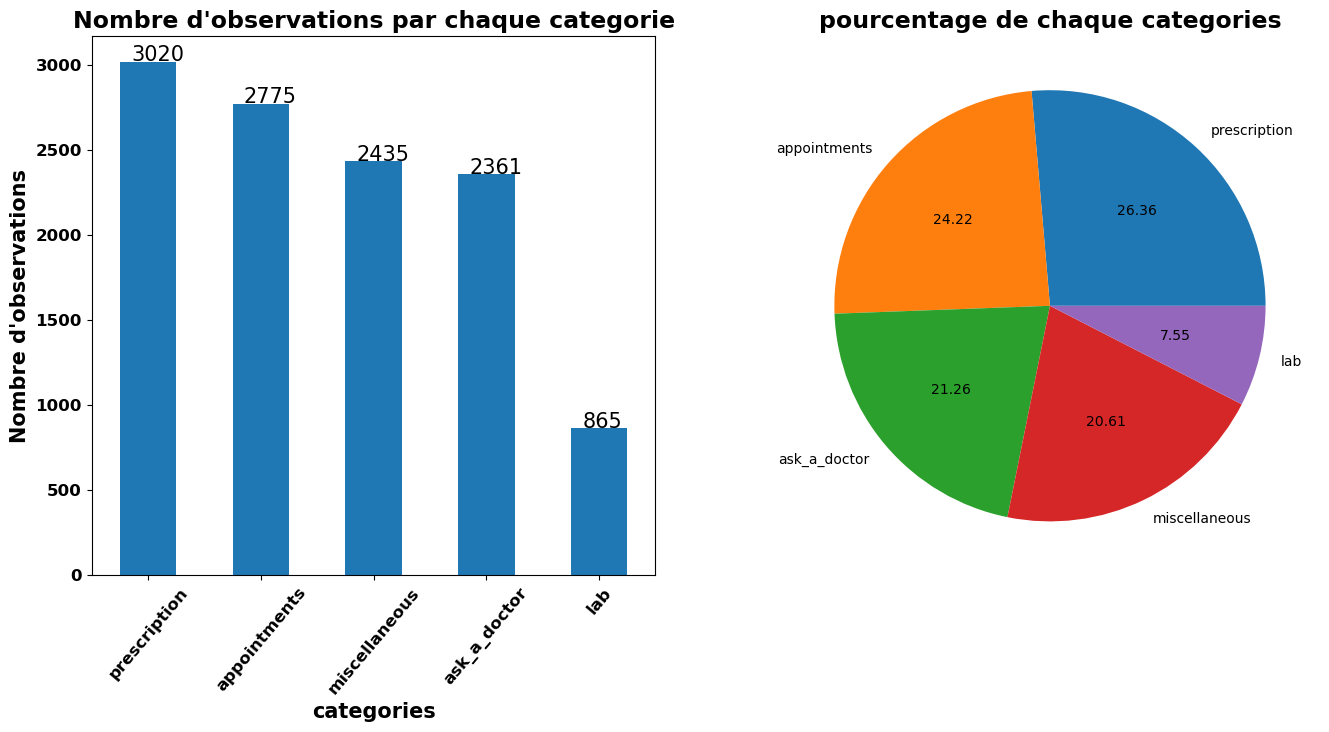

In [15]:
plt.subplots(1,2, figsize=(16,7))
plt.subplot(1,2,1)
ax=data['categories'].value_counts().plot(kind='bar')
plt.xlabel('categories',fontsize=15,fontweight='bold')
plt.xticks(rotation=50,fontsize=12,fontweight='bold')
plt.ylabel("Nombre d'observations",fontsize=15,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title("Nombre d'observations par chaque categorie",fontsize=17,fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')
plt.subplot(1,2,2)
plt.pie(data['categories'].value_counts(), labels=['prescription', 'appointments', 'ask_a_doctor', 'miscellaneous',
       'lab'], autopct='%.2f')
plt.title('pourcentage de chaque categories',fontsize=17,fontweight='bold')

plt.show()

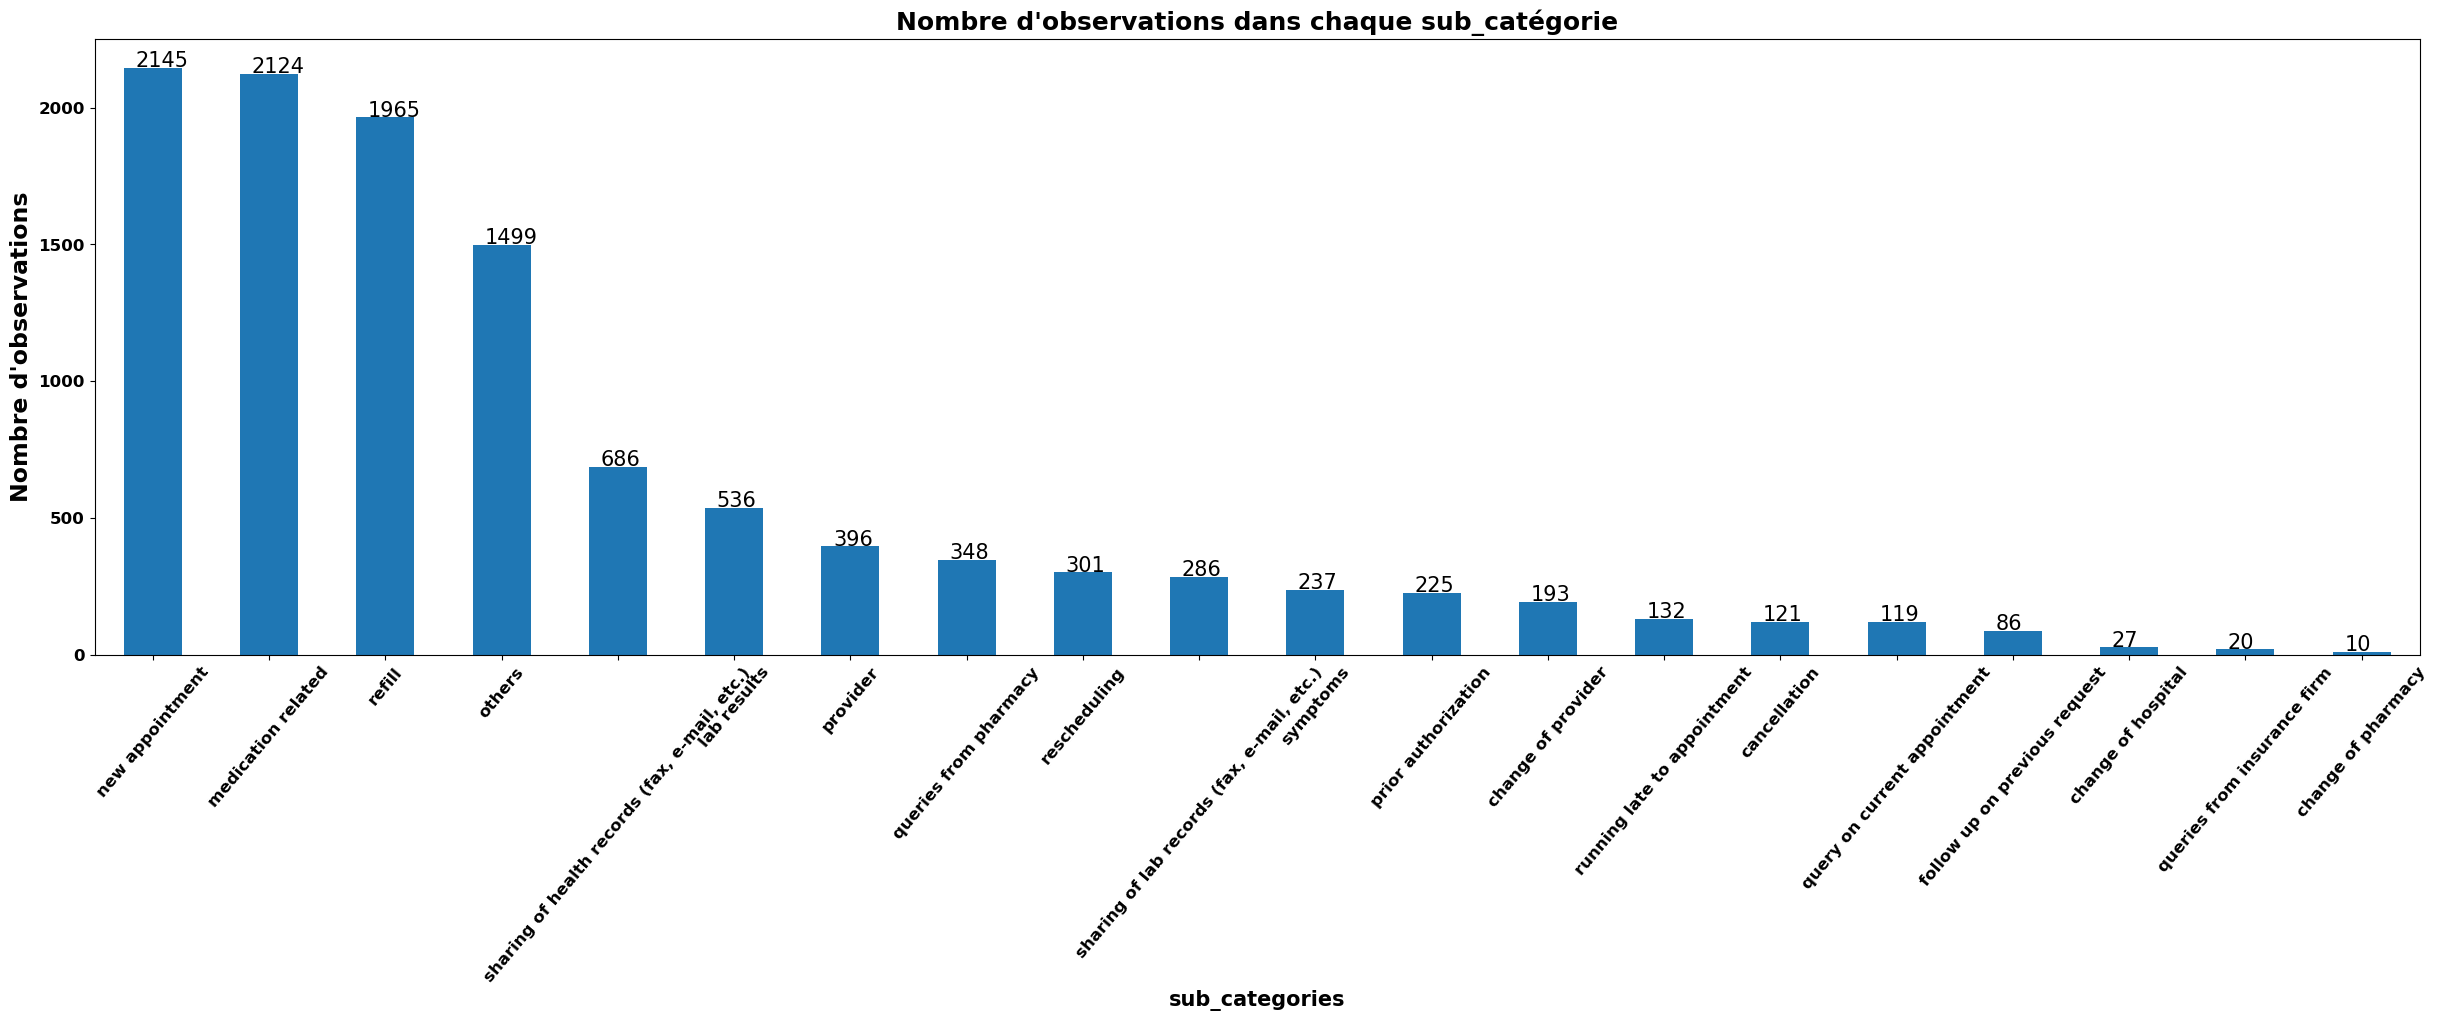

In [16]:
plt.subplots(figsize=(30,8))
ax=data['sub_categories'].value_counts().plot(kind='bar')
plt.xlabel('sub_categories',fontsize=15,fontweight='bold')
plt.xticks(rotation=50,fontsize=12,fontweight='bold')
plt.ylabel("Nombre d'observations",fontsize=17,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title("Nombre d'observations dans chaque sub_catégorie",fontsize=18,fontweight='bold')
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

plt.show()

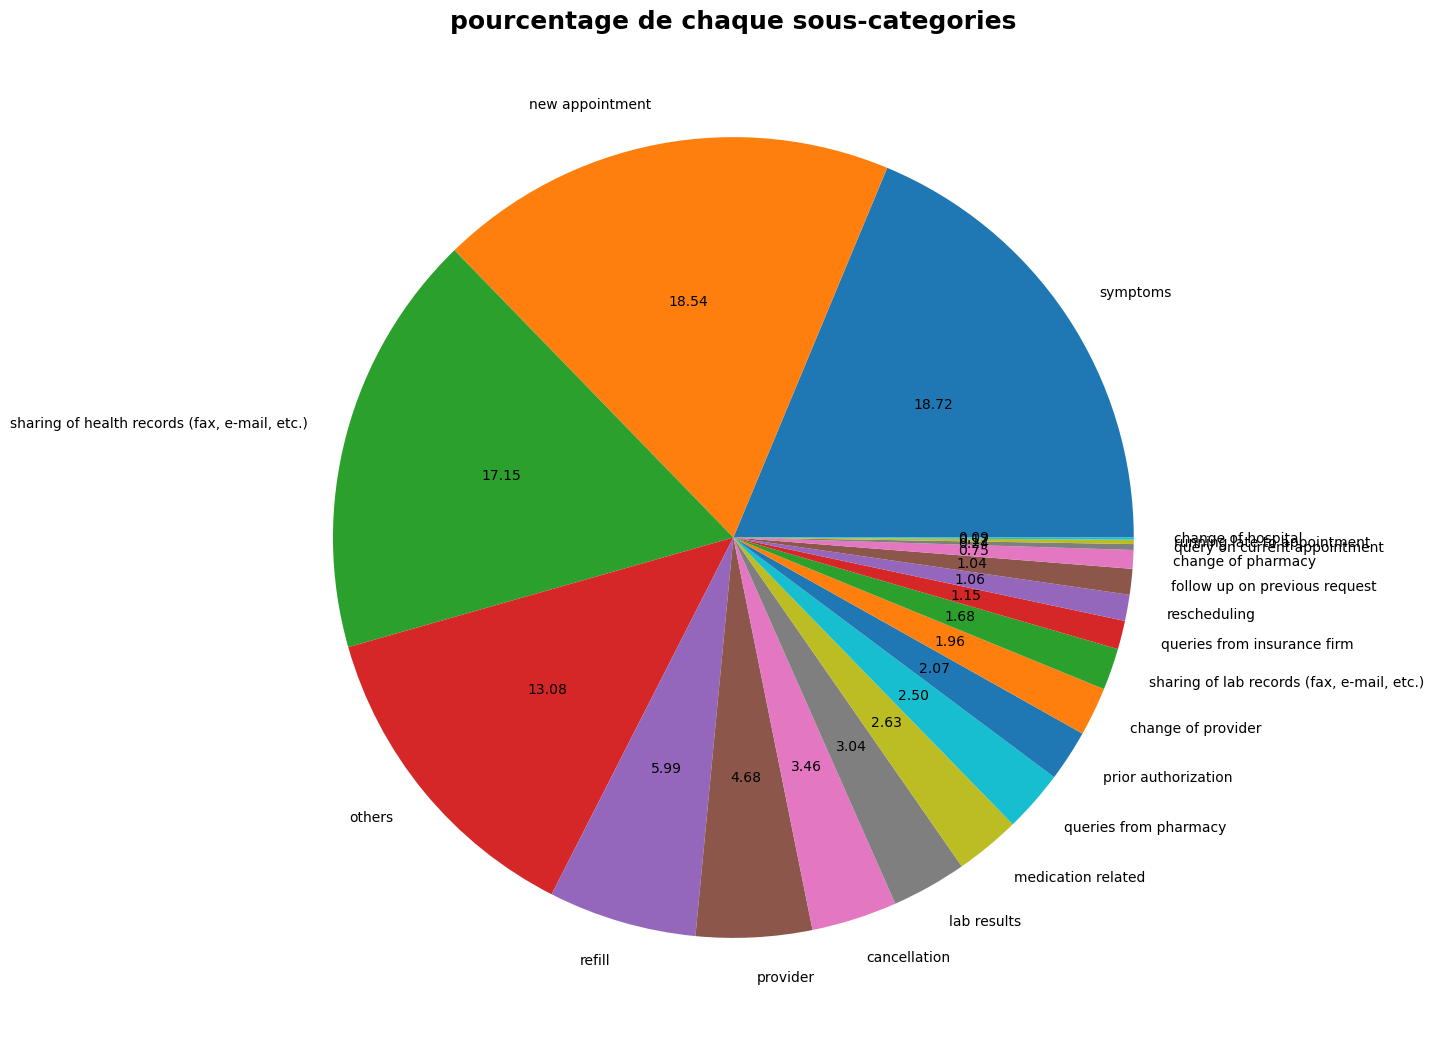

In [17]:
plt.subplots(figsize=(30,13))
plt.pie(data['sub_categories'].value_counts(),labels=['symptoms', 'new appointment',
       'sharing of health records (fax, e-mail, etc.)', 'others',
       'refill', 'provider', 'cancellation', 'lab results',
       'medication related', 'queries from pharmacy',
       'prior authorization', 'change of provider',
       'sharing of lab records (fax, e-mail, etc.)',
       'queries from insurance firm', 'rescheduling',
       'follow up on previous request', 'change of pharmacy',
       'query on current appointment', 'running late to appointment',
       'change of hospital'],autopct='%.2f')
plt.title("pourcentage de chaque sous-categories",fontsize=18,fontweight='bold')
plt.show()

In [18]:
data.sub_categories.unique()

array(['symptoms', 'new appointment',
       'sharing of health records (fax, e-mail, etc.)', 'others',
       'refill', 'provider', 'cancellation', 'lab results',
       'medication related', 'queries from pharmacy',
       'prior authorization', 'change of provider',
       'sharing of lab records (fax, e-mail, etc.)',
       'queries from insurance firm', 'rescheduling',
       'follow up on previous request', 'change of pharmacy',
       'query on current appointment', 'running late to appointment',
       'change of hospital'], dtype=object)

In [20]:
data.columns

Index(['Unnamed: 0', 'fileid', 'SUMMARY', 'DATA', 'categories',
       'sub_categories', 'previous_appointment', 'ID'],
      dtype='object')

In [21]:
data['SUMMARY']

0              dizzy & double vision past 45 mins after CT
1                       pt clld to check on a work in appt
2                                                SCHEDULED
3                         Last office note faxed to NCEENT
4                             PCP Call - pt had concussion
                               ...                        
11456           pt's wife clld to spk with the RN about PT
11457    Phone Note-Jazz 14-002 Narcolepsy research stu...
11458                                      Judy from Xyrem
11459                   ADD ON w Holly for 05/13 @ 2:30 PM
11460         status of FMLA form?- awaiting MD completion
Name: SUMMARY, Length: 11456, dtype: object

In [22]:
string=data['SUMMARY'][0]
print(string)

dizzy & double vision past 45 mins after CT


In [26]:
def global_clean(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    print(tokens)
    return tokens

In [27]:
global_clean(string)

['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']


['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']

In [28]:
data["SUMMARY_V"]=data["SUMMARY"].apply(lambda x: global_clean(x) )


['dizzy', 'double', 'vision', 'past', 'mins', 'after', 'ct']
['pt', 'clld', 'to', 'check', 'on', 'a', 'work', 'in', 'appt']
['scheduled']
['last', 'office', 'note', 'faxed', 'to', 'nceent']
['pcp', 'call', 'pt', 'had', 'concussion']
['rx', 'refill', 'request']
['nancy', 'from', 'new', 'hanover', 'hospital']


TypeError: 'float' object is not iterable

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,0,1,2,3,4,5
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,1
